In [10]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [11]:
training_data = datasets.FashionMNIST(
    root = '../data',
    train = True,
    download = True,
    transform = ToTensor()
    )

test_data = datasets.FashionMNIST(
    root = '../data',
    train = False,
    download = True,
    transform = ToTensor()
    )


In [14]:
batch_size = 64

train_dataloader = DataLoader(training_data, batch_size = batch_size)
test_dataloader = DataLoader(test_data, batch_size = batch_size)

for X, y in test_dataloader:
    print(f'Shape of X [N, C, H, W]: {X.shape}')
    print(f'Shape of y: {y.shape} [y.dtype]')
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) [y.dtype]


In [17]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28,512),
            nn.ReLU(),
            nn.Linear(512,512),
            nn.ReLU(),
            nn.Linear(512,10)
            )
    def forward(self,x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
model = NeuralNetwork().to(device)
print(model)

Using cuda device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [18]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [28]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X,y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        
        pred = model(X)
        loss = loss_fn(pred,y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f'loss:{loss:>7f} [{current:>5d}/{size:>5d}]')
            
            

In [29]:
def test(dataloader,model,loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X,y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred,y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f'Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n')

In [30]:
epochs = 5
for t in range(epochs):
    print(f'Epoch {t+1}\n--------------------')
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print('Done!')

Epoch 1
--------------------
loss:0.751507 [    0/60000]
loss:0.824644 [ 6400/60000]
loss:0.598219 [12800/60000]
loss:0.824215 [19200/60000]
loss:0.719412 [25600/60000]
loss:0.722947 [32000/60000]
loss:0.803827 [38400/60000]
loss:0.765623 [44800/60000]
loss:0.776413 [51200/60000]
loss:0.728515 [57600/60000]
Test Error: 
 Accuracy: 73.6%, Avg loss: 0.736124 

Epoch 2
--------------------
loss:0.717273 [    0/60000]
loss:0.798148 [ 6400/60000]
loss:0.571425 [12800/60000]
loss:0.803816 [19200/60000]
loss:0.700803 [25600/60000]
loss:0.702395 [32000/60000]
loss:0.781538 [38400/60000]
loss:0.750643 [44800/60000]
loss:0.756853 [51200/60000]
loss:0.709856 [57600/60000]
Test Error: 
 Accuracy: 74.4%, Avg loss: 0.716236 

Epoch 3
--------------------
loss:0.688031 [    0/60000]
loss:0.773948 [ 6400/60000]
loss:0.548331 [12800/60000]
loss:0.786082 [19200/60000]
loss:0.684588 [25600/60000]
loss:0.685165 [32000/60000]
loss:0.760786 [38400/60000]
loss:0.737246 [44800/60000]
loss:0.739806 [51200/6000

In [31]:
torch.save(model.state_dict(), "model.pth")
print("Saved Pytorch Model State to model.pth")

Saved Pytorch Model State to model.pth


In [36]:
model = NeuralNetwork()
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

In [60]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[0][0], test_data[0][1]

with torch.no_grad():
    pred = model(x)
    predicted, actual = classes[pred.argmax(1)],classes[y]
    print(f"Predicted: '{predicted}', Actual: '{actual}'")

Predicted: 'Ankle boot', Actual: 'Ankle boot'


In [61]:
#Tensors

In [62]:
import torch
import numpy as np 

In [63]:
data = [[1,2],[3,4]]
x_data = torch.tensor(data)

In [64]:
np_array = np.array(data)
X_np = torch.from_numpy(np_array)

print(np_array)
print(X_np)

[[1 2]
 [3 4]]
tensor([[1, 2],
        [3, 4]])


In [66]:
x_ones = torch.ones_like(x_data)

x_rand = torch.rand_like(x_data,dtype=torch.float)

In [69]:
rand_tensor = torch.rand((2,3))
print(rand_tensor)

ones_tensor = torch.ones((2,3))
print(ones_tensor)

zeros_tensor = torch.zeros((2,3))
print(zeros_tensor)

tensor([[0.1400, 0.9629, 0.4382],
        [0.3053, 0.0379, 0.9775]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [70]:
tensor = torch.rand((3,4))
print(tensor.shape)
print(tensor.dtype)
print(tensor.device)

torch.Size([3, 4])
torch.float32
cpu


In [71]:
if torch.cuda.is_available():
    tensor = tensor.to('cuda')

In [73]:
tensor = torch.ones(4,4)
print(tensor[0])
print(tensor[:,1])
print(tensor[:,-1])
tensor[:,1]=0
print(tensor)

tensor([1., 1., 1., 1.])
tensor([1., 1., 1., 1.])
tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [75]:
t1 = torch.cat([tensor,tensor,tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [76]:
agg = tensor.sum()
agg_item = agg.item()
print(agg_item,type(agg_item))
print(agg)

12.0 <class 'float'>
tensor(12.)


In [77]:
tensor.add_(5)
print(tensor)

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


In [79]:
t = torch.ones(5)
print(t)
n = t.numpy()
print(n)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]


In [82]:
t.add_(1)
print(f'{t}\n')
print(f'{n}\n')

tensor([4., 4., 4., 4., 4.])

[4. 4. 4. 4. 4.]



In [84]:
n = np.ones(5)
t = torch.from_numpy(n)
print(n)
print(t)

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


In [85]:
np.add(n,1,out=n)
print(n)
print(t)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


In [ ]:
#Datasets & DataLoaders

In [88]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root = '../data',
    train = True,
    download = True,
    transform = ToTensor()
)
print(training_data)
test_data = datasets.FashionMNIST(
    root = '../data',
    train = False,
    download = True,
    transform = ToTensor()
)



Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ../data
    Split: Train
    StandardTransform
Transform: ToTensor()


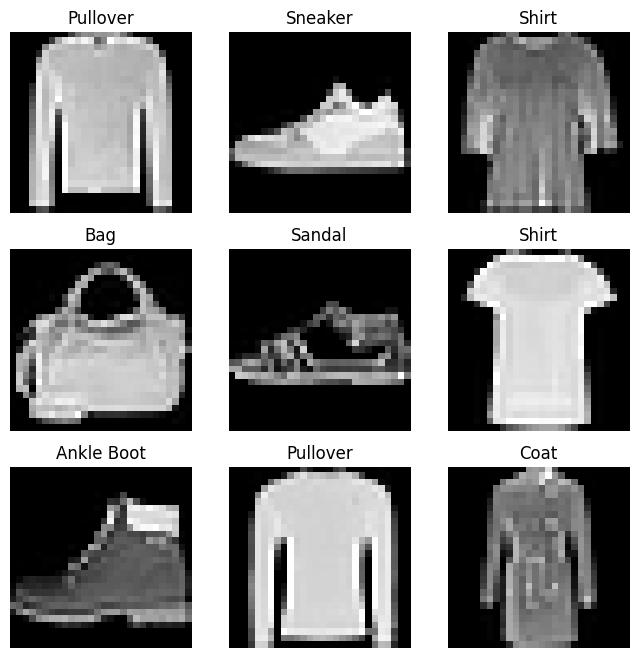

In [90]:
labels_map = {
    0:"T-Shirt",
    1:"Trouser",
    2:"Pullover",
    3:"Dress",
    4:"Coat",
    5:"Sandal",
    6:"Shirt",
    7:"Sneaker",
    8:"Bag",
    9:"Ankle Boot",
}

figure = plt.figure(figsize=(8,8))
cols,rows = 3,3

for i in range(1,cols*rows+1):
    sample_idx = torch.randint(len(training_data),size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows,cols,i)
    plt.title(labels_map[label])
    plt.axis('off')
    plt.imshow(img.squeeze(),cmap='gray')
plt.show()

In [91]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self,annotations_file, img_dir, transform = None, target_transform = None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
    
    def __len__(self):
        return len(self.img_labels)
    
    def __getitem__(self,idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx,1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image,label

In [92]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size = 64, shuffle = True)
test_dataloader = DataLoader(test_data, batch_size = 64, shuffle = True)



Feature batch shape: torch.Size([64, 1, 28, 28])
Label batch shape: torch.Size([64])


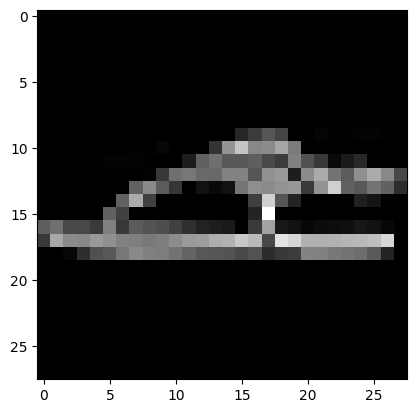

Label:5


In [97]:
train_features, train_labels = next(iter(train_dataloader))
print(f'Feature batch shape: {train_features.size()}')
print(f'Label batch shape: {train_labels.size()}')
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img,cmap='gray')
plt.show()
print(f'Label:{label}')

In [98]:
#Transforms

In [101]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root='../data',
    train = True,
    download = True,
    transform = ToTensor(),
    target_transform = Lambda(lambda y: torch.zeros(10,dtype = torch.float).scatter_(0,torch.tensor(y),value = 1)
))

In [102]:
#Build the neural network

In [103]:
import os
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [104]:
device = "cuda" if torch.cuda.is_available() else 'cpu'
print(f'using {device} device')

using cuda device


In [105]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork,self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28,512),
            nn.ReLU(),
            nn.Linear(512,512),
            nn.ReLU(),
            nn.Linear(512,10),
        )
    def forward(self,x):
        x =self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [106]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [112]:
X = torch.rand((1,28,28),device = device)
logits = model(X)
print(logits)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f'predicted class: {y_pred}')

tensor([[-0.0994,  0.0361, -0.1172,  0.0180, -0.0218, -0.0536,  0.0093,  0.0347,
          0.1035,  0.0167]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([[0.0910, 0.1042, 0.0894, 0.1024, 0.0984, 0.0953, 0.1015, 0.1041, 0.1115,
         0.1022]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
predicted class: tensor([8], device='cuda:0')


In [113]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


In [114]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())


torch.Size([3, 784])


In [118]:
layer1 = nn.Linear(in_features=28*28, out_features = 20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


In [119]:
print(f'before relu: {hidden1} \n\n')
hidden1 = nn.ReLU()(hidden1)
print(f'after relu: {hidden1}')

before relu: tensor([[ 0.2879, -0.1735,  0.0821, -0.7007,  0.0537,  0.1450, -0.6519, -0.0329,
         -0.2977, -0.3908, -0.0925, -0.7873, -0.1456,  0.3103,  0.7079,  0.2373,
         -0.5043, -0.2580, -0.1637, -0.3199],
        [ 0.3623,  0.1602,  0.1816, -0.1298,  0.3016,  0.6212,  0.0438, -0.0867,
         -0.1642, -0.2943,  0.0113, -0.1009, -0.7118, -0.0062,  0.4952, -0.1053,
         -0.2581, -0.2186,  0.1031, -0.2259],
        [ 0.3278,  0.2535,  0.1331, -0.5125,  0.3144,  0.3267,  0.0941,  0.0690,
         -0.0237, -0.3549, -0.1620, -0.2885, -0.2783,  0.2161,  0.5313, -0.0954,
         -0.4905, -0.0137, -0.4111, -0.3791]], grad_fn=<AddmmBackward0>) 


after relu: tensor([[0.2879, 0.0000, 0.0821, 0.0000, 0.0537, 0.1450, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.3103, 0.7079, 0.2373, 0.0000, 0.0000,
         0.0000, 0.0000],
        [0.3623, 0.1602, 0.1816, 0.0000, 0.3016, 0.6212, 0.0438, 0.0000, 0.0000,
         0.0000, 0.0113, 0.0000, 0.0000, 0.0000, 0.4

In [120]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20,10),
)

input_image = torch.rand((3,28,28))
logits =seq_modules(input_image)


In [121]:
pred_probab = nn.Softmax(dim=1)(logits)

In [123]:
print(f'model structure: {model} \n\n')

for name,param in model.named_parameters():
    print(f'Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n')

model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
) 


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[-0.0169, -0.0295,  0.0098,  ...,  0.0038, -0.0059,  0.0037],
        [-0.0260,  0.0271,  0.0122,  ..., -0.0236, -0.0100, -0.0183]],
       device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([ 0.0172, -0.0267], device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[-0.0179,  0.0003,  0.0186,  ..., -0.0124, -0.0404,  0.0156],
        [ 0.0325,  0.0431,  0.0311,  ...,  0.0269, -0.0115, -0.0288]],
       device='cuda:0', grad_fn=<S

In [124]:
#Automatic differentiation with TORCH.AUTOGRAD

In [131]:
import torch

x = torch.ones(5)
y = torch.zeros(3)
w = torch.randn(5,3,requires_grad = True)
b = torch.randn(3,requires_grad = True)
z = torch.matmul(x,w)+b
print(z.shape)

torch.Size([3])


In [132]:
loss = torch.nn.functional.binary_cross_entropy_with_logits(z,y)

In [133]:
print(f'gradient function for z = {z.grad_fn}')
print(f'gradient function for loss = {loss.grad_fn}')

gradient function for z = <AddBackward0 object at 0x7f5b12bf6f70>
gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x7f5b12bf6eb0>


In [134]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.0741, 0.0840, 0.1572],
        [0.0741, 0.0840, 0.1572],
        [0.0741, 0.0840, 0.1572],
        [0.0741, 0.0840, 0.1572],
        [0.0741, 0.0840, 0.1572]])
tensor([0.0741, 0.0840, 0.1572])


In [136]:
z = torch.matmul(x,w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x,w)+b
print(z.requires_grad)

True
False


In [138]:
z = torch.matmul(x,w)+b
z_det =z.detach()
print(z_det.requires_grad)

False


In [170]:
inp = torch.eye(4,5,requires_grad = True)
print(inp)
out = (inp+1).pow(2).T
print(out)
out.backward(torch.ones_like(out),retain_graph = True)
print(f'first call\n {inp.grad}')
out.backward(torch.ones_like(out),retain_graph = True)
print(f'second call\n {inp.grad}')
inp.grad.zero_()
out.backward(torch.ones_like(out), retain_graph = True)
print(f'Call after zeroing gradients\n {inp.grad}')

tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.]], requires_grad=True)
tensor([[4., 1., 1., 1.],
        [1., 4., 1., 1.],
        [1., 1., 4., 1.],
        [1., 1., 1., 4.],
        [1., 1., 1., 1.]], grad_fn=<PermuteBackward0>)
first call
 tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.]])
second call
 tensor([[8., 4., 4., 4., 4.],
        [4., 8., 4., 4., 4.],
        [4., 4., 8., 4., 4.],
        [4., 4., 4., 8., 4.]])
Call after zeroing gradients
 tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.]])


In [171]:
#Optimizing Model Parameters

In [188]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root = '../data',
    train = True,
    download = True,
    transform = ToTensor(),
)

test_data = datasets.FashionMNIST(
    root = '../data',
    train = False,
    download = True,
    transform = ToTensor(),
)

train_dataloader = DataLoader(training_data,batch_size = 64)
test_dataloader = DataLoader(test_data, batch_size = 64 )

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")


class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork,self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28,512),
            nn.ReLU(),
            nn.Linear(512,512),
            nn.ReLU(),
            nn.Linear(512,10),
        )
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
        

Using cuda device


In [189]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

In [190]:
loss_fn = nn.CrossEntropyLoss()

In [191]:
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

In [202]:

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        #Compute the prediction and loss
        pred = model(X)
        loss = loss_fn(pred,y)
        
        #Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch % 100 ==0:
            loss, current = loss.item(), batch * len(X)
            print(f'loss: {loss:>7f} [{current:>5d}/{size:>5d}]')

def test_loop(dataloader,model,loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0
    
    with torch.no_grad():
        for X, y in dataloader:
            X,y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1)==y).type(torch.float).sum().item()
    
    test_loss /= num_batches
    correct /= size
    print(f'Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n')
            
        

In [203]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

epochs = 10
for t in range(epochs):
    print(f'Epoch {t+1} \n ---------------------------------------')
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader,model,loss_fn)

print('Done!')

Epoch 1 
 ---------------------------------------
loss: 1.196462 [    0/60000]
loss: 1.192267 [ 6400/60000]
loss: 1.022782 [12800/60000]
loss: 1.147610 [19200/60000]
loss: 1.025674 [25600/60000]
loss: 1.057750 [32000/60000]
loss: 1.086737 [38400/60000]
loss: 1.037999 [44800/60000]
loss: 1.065164 [51200/60000]
loss: 0.997995 [57600/60000]
Test Error: 
 Accuracy: 65.7%, Avg loss: 1.007915 

Epoch 2 
 ---------------------------------------
loss: 1.068313 [    0/60000]
loss: 1.081515 [ 6400/60000]
loss: 0.896470 [12800/60000]
loss: 1.046643 [19200/60000]
loss: 0.927763 [25600/60000]
loss: 0.956369 [32000/60000]
loss: 0.999795 [38400/60000]
loss: 0.954334 [44800/60000]
loss: 0.977924 [51200/60000]
loss: 0.924468 [57600/60000]
Test Error: 
 Accuracy: 66.9%, Avg loss: 0.927805 

Epoch 3 
 ---------------------------------------
loss: 0.973779 [    0/60000]
loss: 1.005510 [ 6400/60000]
loss: 0.807043 [12800/60000]
loss: 0.976548 [19200/60000]
loss: 0.863712 [25600/60000]
loss: 0.883063 [32000

In [ ]:
#Save and load the model

In [204]:
import torch
import torchvision.models as models

In [205]:
model = models.vgg16(pretrained = True)
torch.save(model.state_dict(),'model_weights.pth')

/opt/conda/envs/d2l-zh/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/opt/conda/envs/d2l-zh/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


URLError: <urlopen error [Errno -3] Temporary failure in name resolution>

In [ ]:
model = models.vgg16()
model.load_state_dict(torch.load('model_weights.pth'))
model.eval()


In [ ]:
torch.save(model,'model.pth')

In [ ]:
model = torch.load('model.pth')